In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
#from time import perf_counter 
import os

thisdict = {
  0: "Apple___Apple_scab",
  1: "Apple___Black_rot",
  2: "Apple___Cedar_apple_rust",
  3: "Apple___healthy",
  4: "Blueberry___healthy",
  5: "Cherry_(including_sour)___healthy",
  6: "Cherry_(including_sour)___Powdery_mildew",
  7: "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
  8: "Corn_(maize)___Common_rust_",
  9: "Corn_(maize)___healthy",
  10: "Corn_(maize)___Northern_Leaf_Blight",
  11: "Grape___Black_rot",
  12: "Grape___Esca_(Black_Measles)",
  13: "Grape___healthy",
  14: "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
  15: "Orange___Haunglongbing_(Citrus_greening)",
  16: "Peach___Bacterial_spot",
  17: "Peach___healthy",
  18: "Pepper,_bell___Bacterial_spot",
  19: "Pepper,_bell___healthy",
  20: "Potato___Early_blight",
  21: "Potato___healthy",
  22: "Potato___Late_blight",
  23: "Raspberry___healthy"
}



In [2]:
from keras.layers import Convolution2D

Using TensorFlow backend.


In [3]:
from keras.layers import MaxPooling2D

In [4]:
from keras.layers import Flatten

In [5]:
from keras.layers import Dense

In [6]:
from keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                   input_shape=(64, 64, 3)
                       ))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                       ))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Flatten())

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(Dense(units=128, activation='relu'))

In [17]:
model.add(Dense(units=60, activation='relu'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 60)               

In [19]:
model.add(Dense(units=24, activation='softmax'))
#model.add(Dense(8, activation='softmax'))   # Final Layer using Softmax

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 60)               

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [22]:
from keras_preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'DataSet/TrainingDataset/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        'DataSet/TestDataset/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 7234 images belonging to 24 classes.
Found 3328 images belonging to 24 classes.


In [24]:

model.fit(
        training_set,
        steps_per_epoch=7234,
        epochs=2,
        validation_data=test_set,
        validation_steps=800)
        

'\nmodel.fit(\n        training_set,\n        steps_per_epoch=7234,\n        epochs=2,\n        validation_data=test_set,\n        validation_steps=800)\n        '

In [25]:
#model.save('DiseaseSava.h5')

In [26]:
from keras.models import load_model
import matplotlib.pyplot as plt

In [27]:
m = load_model('DiseaseSava.h5')

In [28]:
from keras.preprocessing import image

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.7
 0.    0.    0.    0.    0.    0.    0.21  0.    0.086 0.004 0.    0.   ]
Number of Categories: 24
Category Number: 18
Leaf and Disease Name: Pepper,_bell___Bacterial_spot


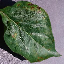

In [32]:
import numpy as np
import random
n = random.randint(0,23)
test_image = image.load_img("DataSet/SinglePrediction/%d.JPG" %n , target_size=(64,64))
test_image1 = image.img_to_array(test_image)
test_image2 = np.expand_dims(test_image1, axis=0)
p = m.predict(test_image2)


num = np.array(p[0])  
np.set_printoptions(precision = 3, suppress = True) 
print(num)

print("Number of Categories:",len(num))
print("Category Number:",n)
print("Leaf and Disease Name:",thisdict[n])
test_image

In [110]:
#test_set.class_indices

In [ ]:
#plt.imshow(test_set[4][0][5])

In [ ]:
#plt.imshow(training_set[0][0][6])

In [ ]:
#theta3 =np.zeros(10,dtype='float32')

In [ ]:
'''
x = np.float32(q)
x.tolist()            # 1.899999976158142
x.item()              # 1.899999976158142
x.view()              # 1.9
str(x)                # '1.9'
float(str(x))  

x = np.float32(q)
print(type(x))
v = x.item()
print(type(v))
print(v)

import numpy
print(type(q))
print(q)
print(type(numpy.float(q)))
print(numpy.float(q))


lst = []
print(q)
o = "{:.23f}".format(q)
lst.append(o)
"""

In [ ]:
'''
import numpy as np
np.set_printoptions(suppress=True) 
a = np.array(q) 
print(a) 
'''

In [ ]:
'''
import numpy as np
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:.25f}'.format})

a = np.array(q) 

print(a)  
'''

In [ ]:
'''
import numpy as np  
num = np.array(p[0])  
  
#print("Numpy array values with precision 2:\n") 
np.set_printoptions(precision = 2, suppress = True) 
print(num)
'''

In [ ]:
'''
lst = []
import numpy as np
import sys
e = np.savetxt(sys.stdout, p, '%19.3f') 
lst.append(e)
'''

In [ ]:
"""
for i in range(1,34):
    #print(i)
    test_image = image.load_img("DataSet/SinglePrediction/%d.JPG" %i , target_size=(64,64))
    test_image = image.img_to_array(test_image)
    #print(test_image.shape)
    test_image = np.expand_dims(test_image, axis=0)
    #print(test_image.shape)
    #print(m.predict(test_image))
    """

In [ ]:
"""
test_image = image.load_img('DataSet/SinglePrediction/f.JPG', 
               target_size=(64,64))
type(test_image)
test_image = image.img_to_array(test_image)
type(test_image)
test_image.shape
import numpy as np 
test_image = np.expand_dims(test_image, axis=0)
test_image.shape
m.predict(test_image)
"""